In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from scipy import special
from scipy.stats import linregress
%matplotlib inline

In [2]:
a = np.load('anscombe.npy')

## Anscombe

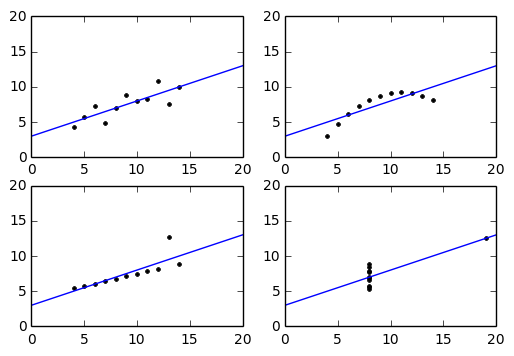

In [3]:
x = [0,20]
y = [0,20]
l = np.linspace(0,20,100)

plt.subplot(2,2,1)

plt.plot(a[:,0],a[:,1],"k.")
plt.plot(l,0.5*l+3)
plt.xlim(x)
plt.ylim(y)

plt.subplot(2,2,2)

plt.plot(a[:,2],a[:,3],"k.")
plt.plot(l,0.5*l+3)
plt.xlim(x)
plt.ylim(y)

plt.subplot(2,2,3)

plt.plot(a[:,4],a[:,5],"k.")
plt.plot(l,0.5*l+3)
plt.xlim(x)
plt.ylim(y)

plt.subplot(2,2,4)

plt.plot(a[:,6],a[:,7],"k.")
plt.plot(l,0.5*l+3)
plt.xlim(x)
plt.ylim(y)

plt.show()

Each of these plots is unique in that their shapes are different, when looking at the first few moments we find that they are the same (e.g., mean, variance). However, when you dive in a little more you'll see the data is quite different. 

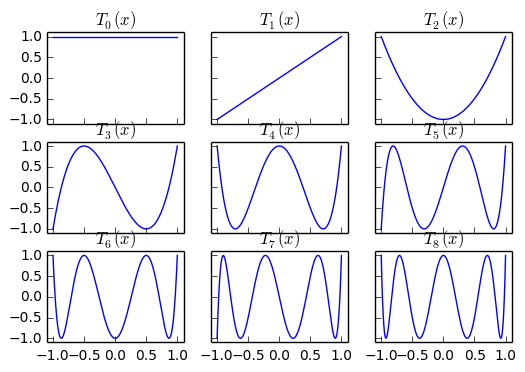

In [4]:
# Test of polynomial module in numpy

T = np.polynomial.Chebyshev.basis
x = np.linspace(-1, 1, 200)
for n in range(9):
    plt.subplot(3,3,n+1)
    plt.plot(x, T(n)(x), label="n = "+str(n))
    plt.axis([-1.1, 1.1, -1.1, 1.1])
    # Turn off extra tick marks and axis labels.
    plt.tick_params(which="both", top="off", right="off")
    if n < 6: # Remove x-axis label on upper plots.
        plt.tick_params(labelbottom="off")
    if n % 3: # Remove y-axis label on right plots.
        plt.tick_params(labelleft="off")
    plt.title(r"$T_{}(x)$".format(n))
plt.show()

## Bernstein Polynomials

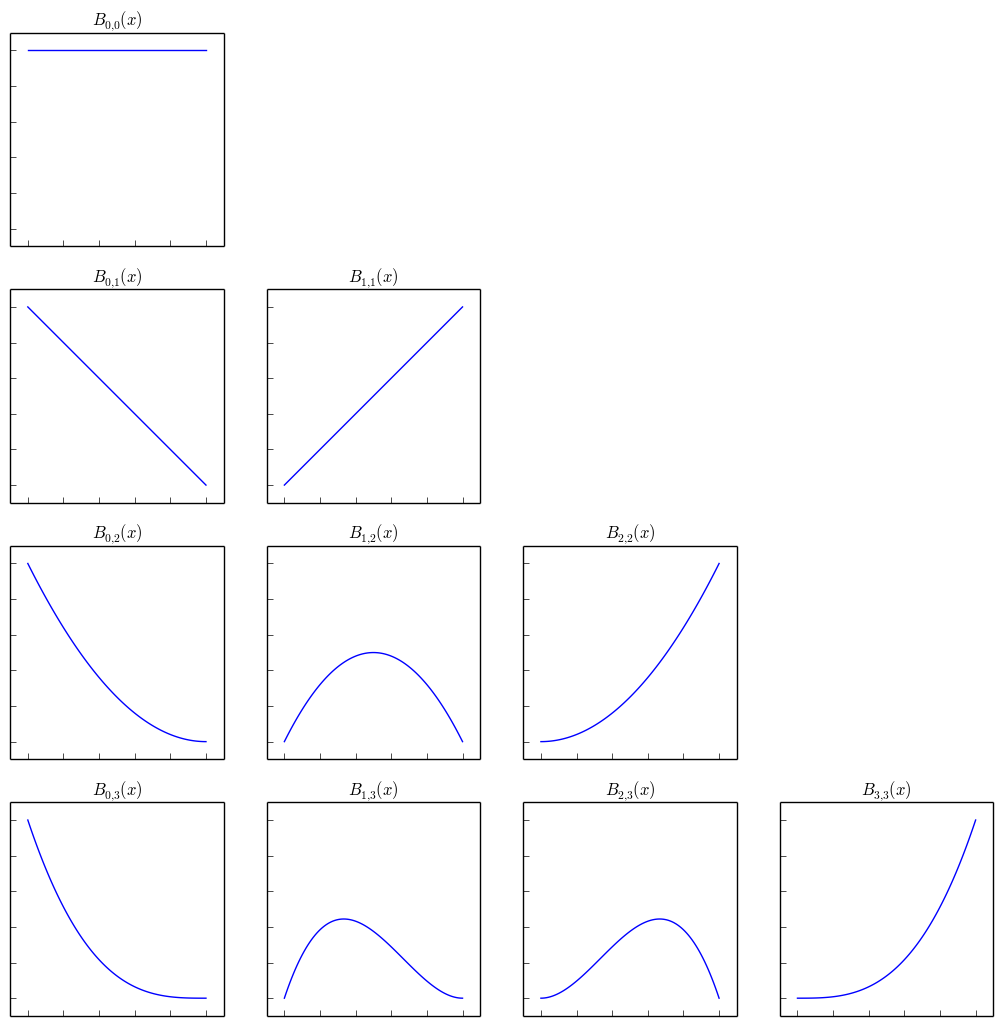

In [5]:
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
counter = 1
plt.figure(figsize=(16,16))
for n in range(4):
    for v in range(n+1):
        plt.subplot(5,5,n*5+v+1)
        plt.axis([-0.1, 1.1, -0.1, 1.1])
        plt.tick_params(which="both", top="off", right="off")
        plt.plot(x,special.binom(n,v)*x**v*(1-x)**(n-v))
        
#         plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=0.5)
        if counter in {1,2,4,3,5,6,7,8,9,10}: # Remove x-axis label on upper plots.
            plt.tick_params(labelbottom="off")
            plt.tick_params(labelright="off")
            plt.tick_params(labeltop="off")
            plt.tick_params(labelleft="off")
            
        plt.title(r"$B_{"+ str(v)+ ","+ str(n) +"}(x)$")
        
        counter += 1
        



## Major League Baseball:  height, weight, and age comparison

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


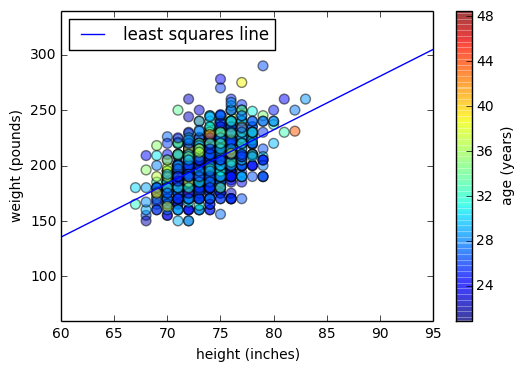

In [6]:
mlb = np.load("mlb.npy")
plt.scatter(mlb[:,0],mlb[:,1],c=mlb[:,2],s=50, alpha=0.5)
a,b,stuff1,stuf2f,stuf3f = linregress(mlb[:,0],mlb[:,1])
x = np.linspace(60,95,100)
plt.xlim([60,95])
plt.ylim([60,340])
plt.plot(x,a*x+b,label="least squares line")
plt.xlabel("height (inches)")
plt.ylabel("weight (pounds)")
plt.legend(loc = "upper left")
cbar = plt.colorbar()
cbar.set_label("age (years)")

plt.show()

We see above that there is a correlation between height and weight, however there does not seem to be any significant relationship between those values and the age of a player

## Earthquake Plots

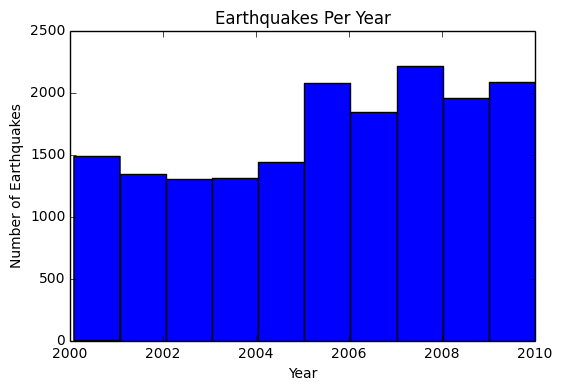

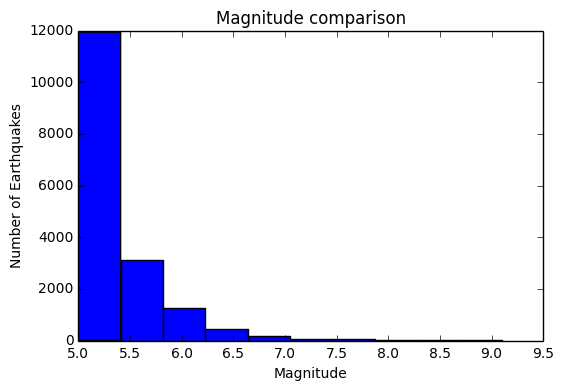

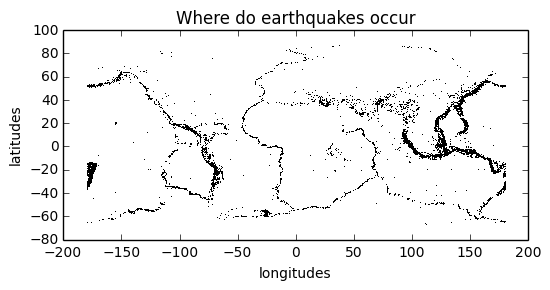

In [7]:
year, magnitude, longitude, latitude = np.load("earthquakes.npy").T

plt.hist(year, bins=10)
plt.title("Earthquakes Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.show()

plt.hist(magnitude,bins=10)
plt.title("Magnitude comparison")
plt.xlabel("Magnitude")
plt.ylabel("Number of Earthquakes")
plt.show()


plt.plot(longitude, latitude, 'k,')
plt.title("Where do earthquakes occur")
plt.ylabel("latitudes")
plt.xlabel("longitudes")
plt.gca().set_aspect("equal")

## Rosenbrock function

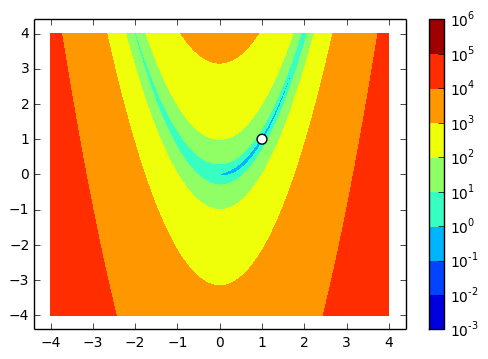

In [8]:
l = np.linspace(-4,4,200)
X,Y = np.meshgrid(l,l.copy())
Z = (1-X)**2 + 100*(Y - X**2)**2

plt.contourf(X, Y, Z,30,norm=LogNorm())
plt.colorbar()
plt.scatter(1,1,c="white",s=50)
plt.show()

## Visualizing Countries

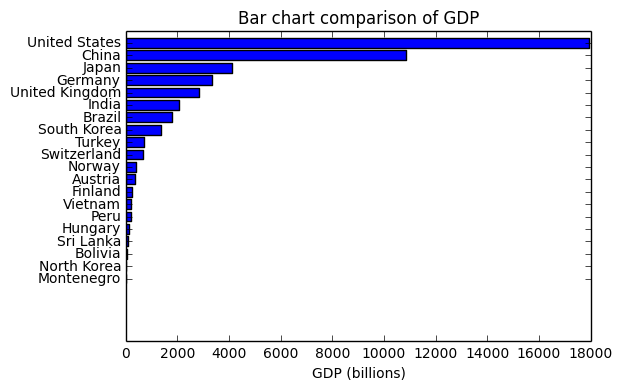

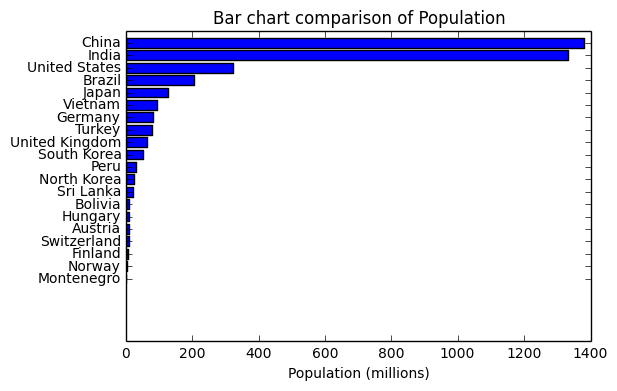

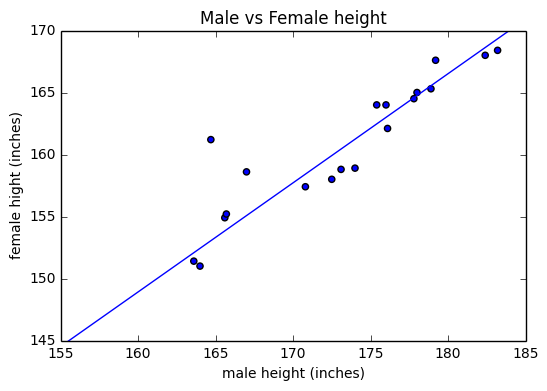

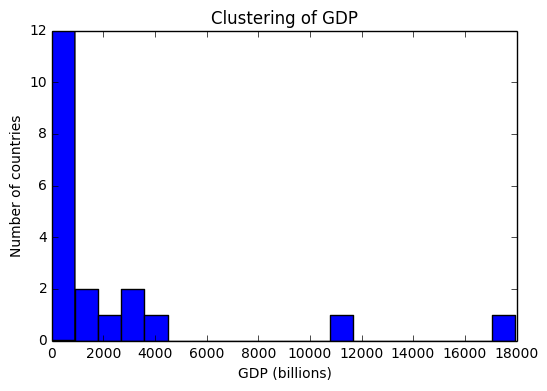

In [9]:
c = np.load("countries.npy")
labels = ["Austria", "Bolivia", "Brazil", "China",
"Finland", "Germany", "Hungary", "India",
"Japan", "North Korea", "Montenegro", "Norway",
"Peru", "South Korea", "Sri Lanka", "Switzerland",
"Turkey", "United Kingdom", "United States", "Vietnam"]
pop_indeces = np.argsort(c[0:,0])
gdp_indeces = np.argsort(c[0:,1])

l = []
k = []
for i in pop_indeces:
    l.append(labels[i])
    
for i in gdp_indeces:
    k.append(labels[i])
    
positions = np.arange(len(labels))
plt.barh(positions, sorted(c[0:,1]),align="center")
plt.yticks(positions, k)
plt.xlabel("GDP (billions)")
plt.title("Bar chart comparison of GDP")
plt.show()

positions = np.arange(len(labels))
plt.barh(positions, sorted(c[0:,0]),align="center")
plt.yticks(positions, l)
plt.xlabel("Population (millions)")
plt.title("Bar chart comparison of Population")
plt.show()

plt.scatter(c[0:,2],c[0:,3])
a,b,stuff1,stuf2f,stuf3f = linregress(c[:,2],c[:,3])
x = np.linspace(155,185,100)
plt.xlim([155,185])
plt.ylim([145,170])
plt.plot(x,a*x+b,label="least squares line")
plt.xlabel("male height (inches)")
plt.ylabel("female hight (inches)")
plt.title("Male vs Female height")
plt.show()


plt.hist(c[0:,1] ,bins=20)
plt.title("Clustering of GDP")
plt.xlabel("GDP (billions)")
plt.ylabel("Number of countries")
plt.show()
